## **Table of Contents:**
* Introduction
* Exploratory data analysis
* Data Preprocessing
    - Converting Features
    - Creating Categories
    - Creating new Features
* Building Machine Learning Models
    - Training different models
    - Which is the best model ?

# **Introduction**

The database we are working with classifies people into 16 distinct personality types showing their last 50 tweets, separated by "|||". 


MYERS BRIGGS CLASSIFICATION PROBLEM

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)

Intuition (N) – Sensing (S)

Thinking (T) – Feeling (F)

Judging (J) – Perceiving (P)

(Note that the opposite personalities are aligned above to give one a sense of difference in the meanings of the personalities while compariing them with each other.)

So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

From scientific or psychological perspective it is based on the work done on cognitive functions by Carl Jung i.e. Jungian Typology. This was a model of 8 distinct functions, thought processes or ways of thinking that were suggested to be present in the mind. Later this work was transformed into several different personality systems to make it more accessible, the most popular of which is of course the MBTI.

Recently, its use/validity has come into question because of unreliability in experiments surrounding it, among other reasons. But it is still clung to as being a very useful tool in a lot of areas, and the purpose of this dataset is to help see if any patterns can be detected in specific types and their style of writing, which overall explores the validity of the test in analysing, predicting or categorising behaviour. Content

This dataset contains over 8600 rows of data, on each row is a person’s:

Type (This persons 4 letter MBTI code/type)
A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))
![Meyer Briggs Personality Template](https://theelementsofdigitalstyle.com/wp-content/uploads/Myers-Briggs-illustration-3-2.jpg)

Our goal will be to create new columns based on the content of the tweets, in order to create a predictive model. As we will see, this can be quite tricky and our creativity comes into play when analysing the content of the tweets.

We begin by importing our dataset and showing some info, for an initial exploratory analysis.

In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv(r"C:\Users\jbaby\documents\DLK\personality\mbti_1.csv")
print(df.head(10))
print("*"*40)
print(df.info())


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


We can thus see that there are no null inputs, which means there is no need for cleaning the data. 

The first idea that pops up is checking if the words per tweet of each person shows us some information. For that reason, we can create a new column as shown below.


In [2]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


# **Exploratory data analysis**

We may use it for one reason or for another, but one thing we can do is printing a violin plot. 

At the end I did not use it at all, but it is always nice to have the ability do some visual analysis for further investigations. 

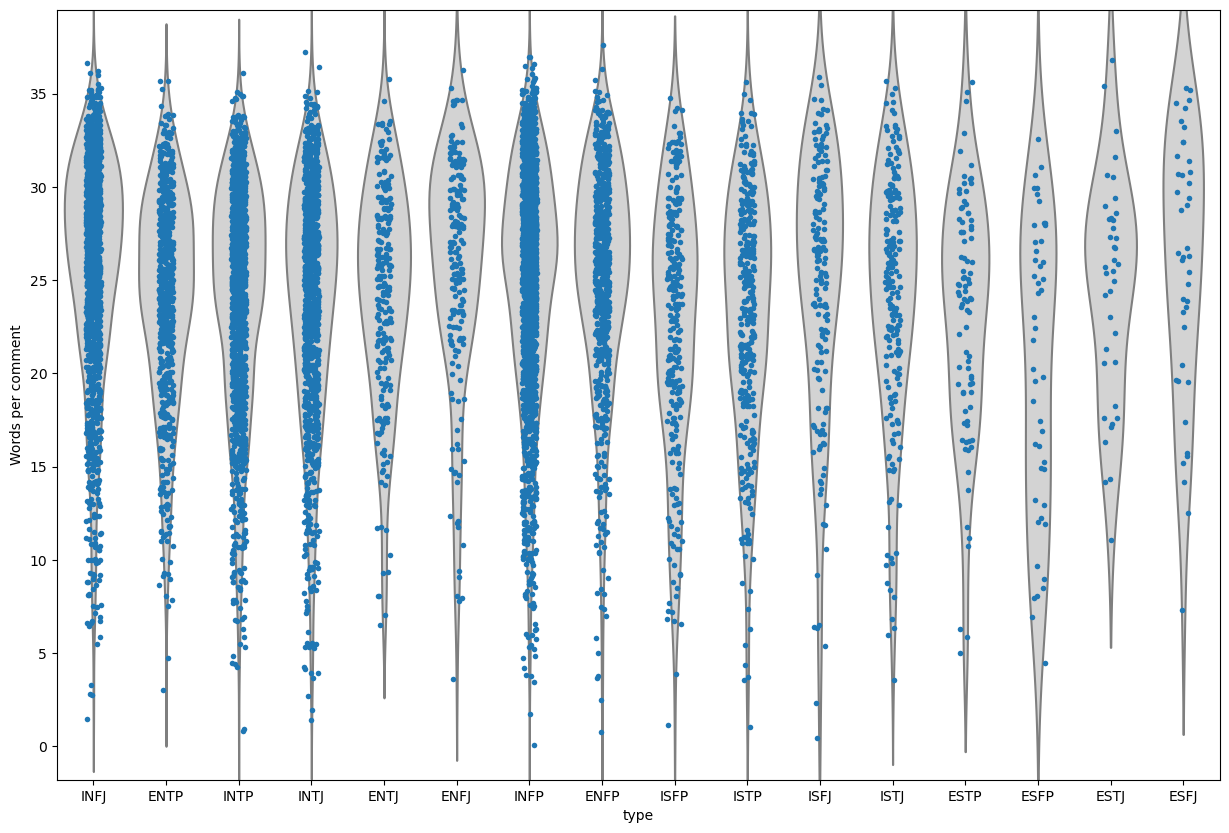

In [3]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

There's quite a lot of information there. 

Creating new columns showing the amount of questionmarks per comment, exclamations or other types will be useful later on, as we will see. This are the examples I came up with, but here is where creativity comes into play.

We can also perform joint plots, pair plots and heat maps to explore relationship between data, just for fun.

<Figure size 1500x1000 with 0 Axes>

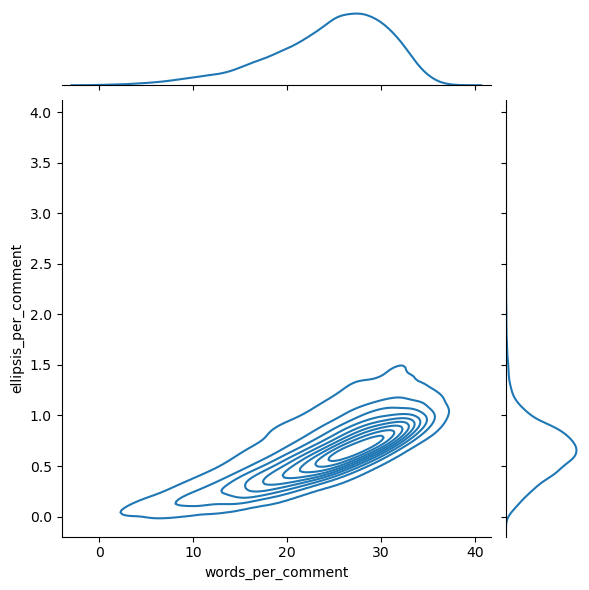

In [4]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')

So it seems there's a large correlation between words per comment ant the ellipsis the user types per comment! Based on pearson correlation factor there is a note of of 69% correlation between ellipsis_per_comments and words_per_comment. 

<center><h3> 69% ~ words correlating with ellipsis</h3> </center>

This is an interesting first step, and we are interested in taking a further look into the data as we are on a mission to discover if we can predict the personality types of users based on there social media comments with a little help from machine learning. :)

### Exploratory Analysis Pt. 2
We are focusing on the correlation variables for  the different types of the personality types the Meyer Briggs outline in comparision to the words comments and ellipses per comment as well. Let's see which personality type will yield the highest correlation value. 

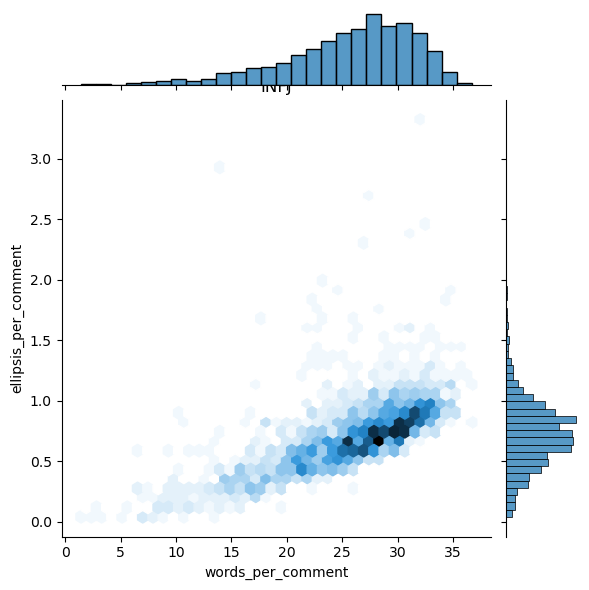

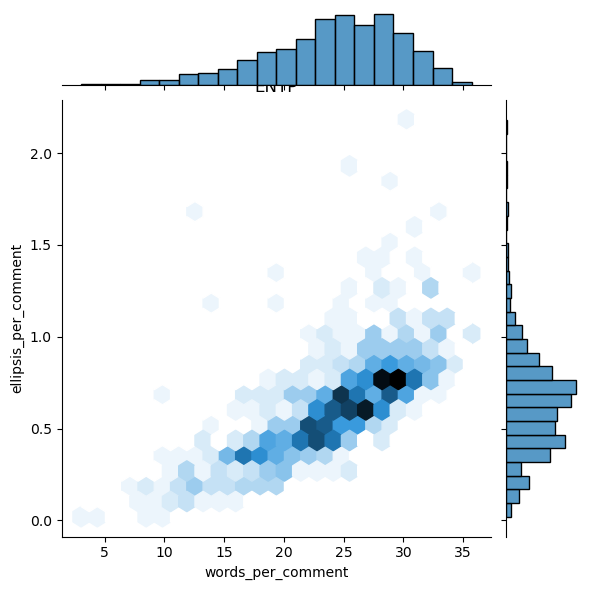

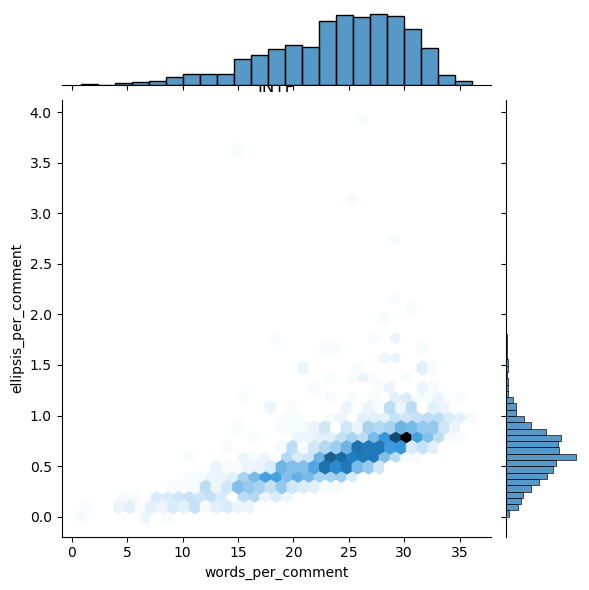

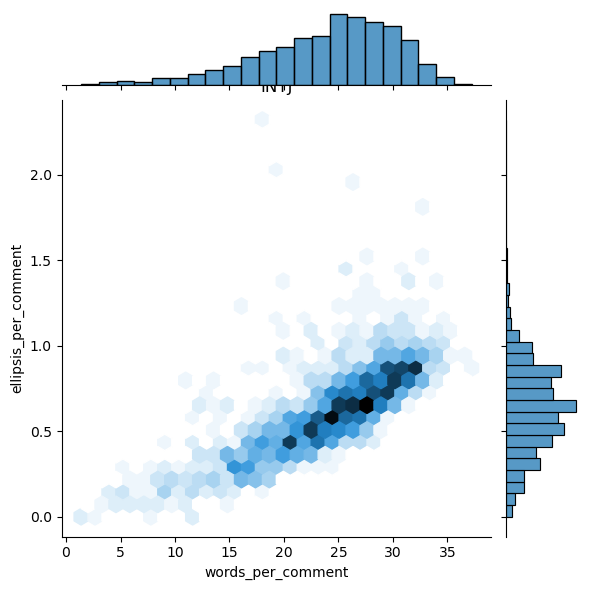

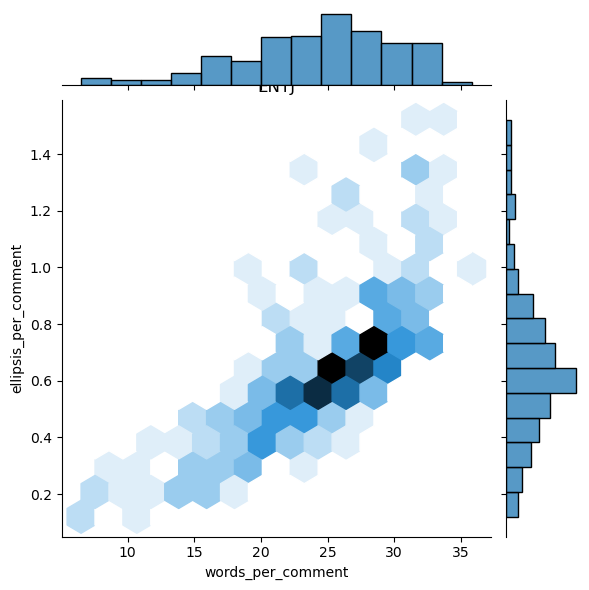

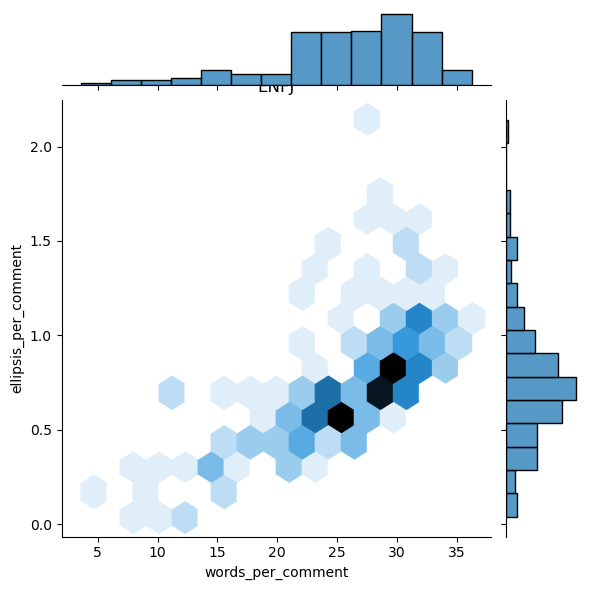

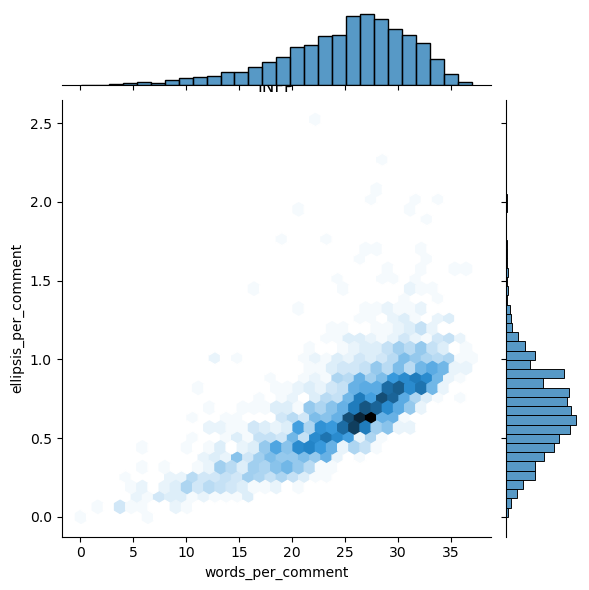

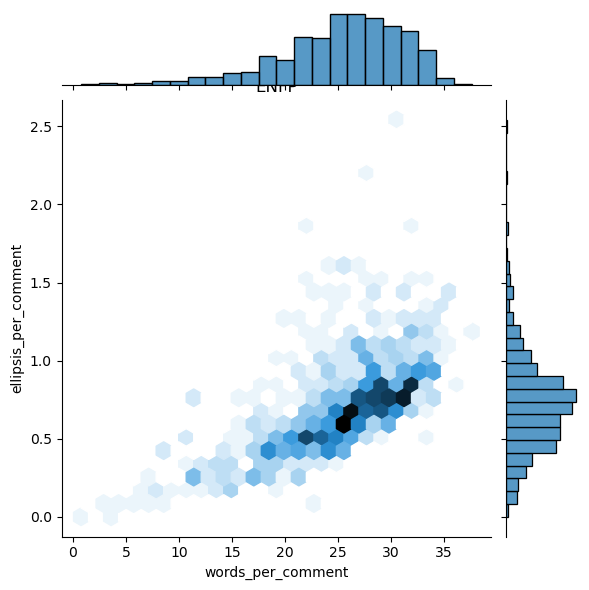

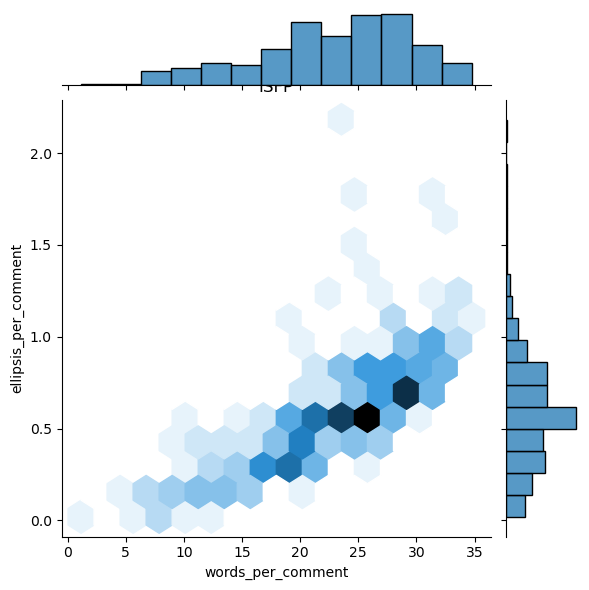

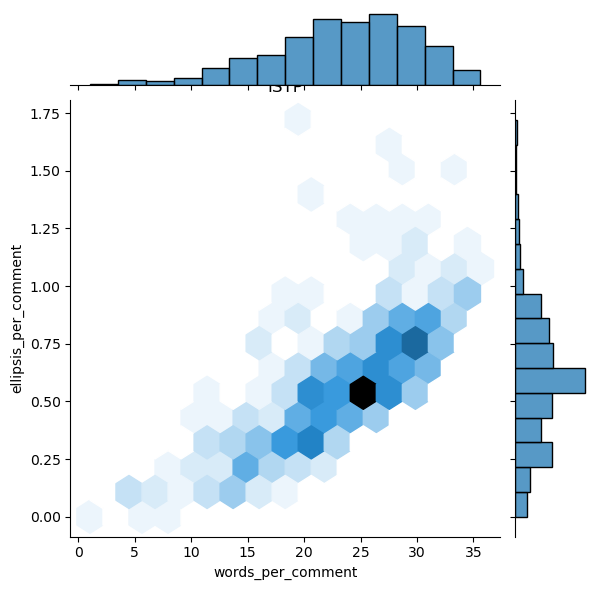

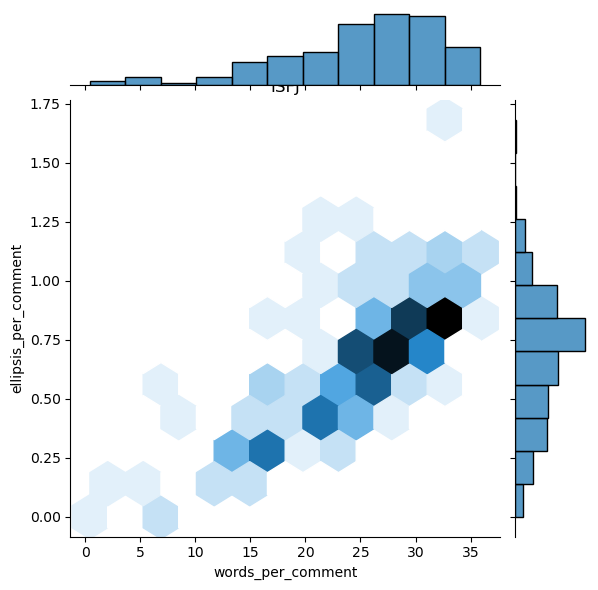

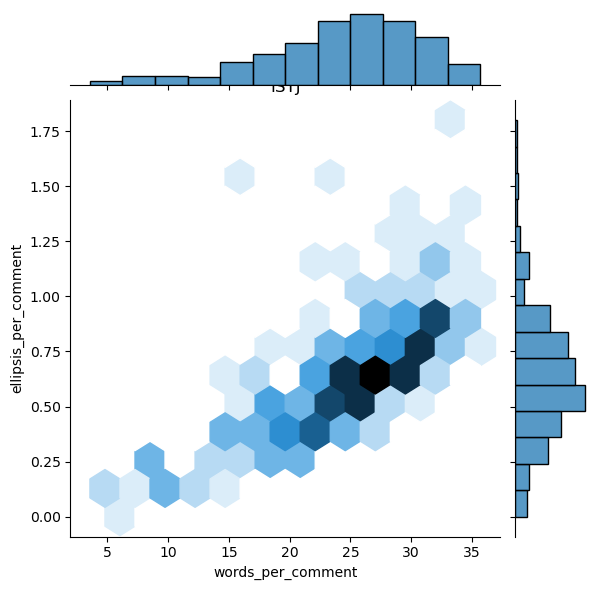

In [5]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1


0.6399820319539541
0.7054114704760909
0.641741709999527
0.7418360967765788
0.7423804864273494
0.6701370930896873
0.7223598412495943
0.6421043831098795
0.7239129106930459
0.7305845421989157
0.760423088098855
0.6974642499076582
[0.760423088098855, 0.7423804864273494, 0.7418360967765788, 0.7305845421989157, 0.7239129106930459, 0.7223598412495943, 0.7054114704760909, 0.6974642499076582, 0.6701370930896873, 0.6421043831098795, 0.641741709999527, 0.6399820319539541]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


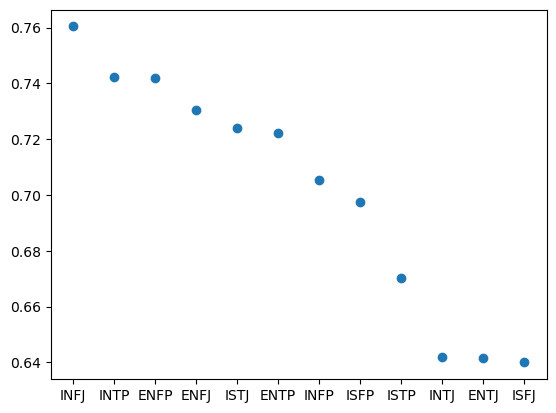

In [6]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

# Discussion
Highest correlation values to the ellispes and comments are as following for the top three:
* INFJ  - Intorversion Intuition Feeling Judging 
* INTP 
* ENFP 
* 

# **Data preprocessing**

To get a further insight on our dataset, we can first create 4 new columns dividing the people by introversion/extroversion, intuition/sensing, and so on. 

When it comes to performing machine learning, trying to distinguish between two categories is much easier than distinguishing between 16 categories. We will check that later on. Dividing the data in 4 small groups will perhaps be more useful when it comes to accuracy.

In [7]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

# **Building machine learning algorithms**

Let's do some machine learning now, first with the entire "type" column, with different models. Let's crank it out to the max!

In [8]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

(8675,)
(8675, 7)
17.04 %


In [9]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [10]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

23.25 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

46.62 %


## Machine Learning Discussion
Our simple model is only able to classify people with a 24% of right guesses, which is not too much. 

Now we will perform machine learning with the introverted/extroverted column, and we'll see if our model is able to classify if someone is introverted or extroverted with a higher precision. So let's take a deeper dive into our model to get a better perspective on our predicting. Because this isn't going to be high enough quality to be helpful for anyone. :(

In [12]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print("outcome shape",yy.shape)
print("input shape for machine learning data",XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

sgdd = SGDClassifier(max_iter=5, tol=None)
sgdd.fit(XX_train, yy_train)
Y_predd = sgdd.predict(XX_test)
sgdd.score(XX_train, yy_train)
acc_sgdd = round(sgdd.score(XX_train, yy_train) * 100, 2)
print(round(acc_sgdd,2,), "%")

outcome shape (8675,)
input shape for machine learning data (8675, 10)
65.53 %


In [13]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_random_forestt,2,), "%")

Random Forest Predictions Model 100.0 %


In [14]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

Logisitic Regression Prediction Accuracy 77.12 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 83.66 %


# Random Forest Prediction

Random Forest Prediction - 100 %
Logistic Regression Prediction - 77.1 %
Knn neighbor prediction model - 83.66 %

So we see our model has an accuracy of 77%, not bad for such a simple model! Let's see what else we can do!

In [16]:
new_column=[]
for z in range(len(df['posts'])):
    prov=df['posts'][z]
    prov2= re.sub(r'[“€â.|,?!)(1234567890:/-]', '', prov)
    prov3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', prov)
    prov4 = re.sub(r'[|||)(?.,:1234567890!]',' ',prov3)
    prov5 = re.sub(' +',' ', prov4)
    prov6 = prov5.split(" ")
    counter = Counter(prov6)
    counter2 = counter.most_common(1)[0][0]
    new_column.append(counter2)
df['most_used_word'] = new_column
print(df.head())
print(df['most_used_word'].unique())

C:\Users\jbaby\AppData\Local\Temp\ipykernel_5276\3849261700.py:6: FutureWarning: Possible set union at position 2
  prov4 = re.sub(r'[|||)(?.,:1234567890!]',' ',prov3)


   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48               0.02                  0.36             0.12   
1              0.20               0.00                  0.10             0.02   
2              0.10               0.00                  0.24             0.00   
3              0.04               0.02                  0.22             0.00   
4              0.12               0.02                  0.20             0.04   

   excl_per_comment  ellip

Conclusion

We have identified and outline the key personality traits of different types of people. The biggest takeaways is that personality type does not predict success or future results. What it does predict is your strengths and weaknesses in terms of personality. And one of the things I have taken into consideration is that when we are creating teams to fight crime, develop amazing software, or simple play sports. It's important to consider everyone technical position on the team, but it's also deeply important to explore to soft skills to ensure strengths and weakness are balanced. Which allows another layer of interdisciplinary not only in technicall skill set, but also in mindset and personality. In short, this is just the first step into creating a personality type model based on meyers briggs assessment from social media comment data. The next step is to focus in one close domain use cases to solve real problems. 
![Personality](https://bj1oh303t6x351kzp35xea4o-wpengine.netdna-ssl.com/wp-content/uploads/2014/08/mbti-dating-infographic-section1.gif)

In [19]:
X

array([[1.112e+01, 4.800e-01, 2.000e-02, ..., 1.200e-01, 6.000e-02,
        3.000e-01],
       [2.340e+01, 2.000e-01, 0.000e+00, ..., 2.000e-02, 0.000e+00,
        3.800e-01],
       [1.672e+01, 1.000e-01, 0.000e+00, ..., 0.000e+00, 8.000e-02,
        2.600e-01],
       ...,
       [1.896e+01, 4.000e-02, 0.000e+00, ..., 0.000e+00, 2.000e-02,
        3.800e-01],
       [3.410e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e-02,
        9.400e-01],
       [2.722e+01, 6.000e-02, 0.000e+00, ..., 0.000e+00, 1.000e-01,
        4.800e-01]])